In [1]:
from fenics import *
import matplotlib.pyplot as plt

In [2]:
import numpy as np
print(np.__version__)  # Должно вывести: 1.24.0

1.26.4


In [3]:
import gmsh
import meshio
import os

In [85]:
# Initialize gmsh:
gmsh.initialize()
 
# cube points:
lc = 1e-2
point1 = gmsh.model.geo.add_point(0, 0, 0, lc)
point2 = gmsh.model.geo.add_point(1, 0, 0, lc)
point3 = gmsh.model.geo.add_point(1, 1, 0, lc)
point4 = gmsh.model.geo.add_point(0, 1, 0, lc)

line1 = gmsh.model.geo.add_line(point1, point2)
line2 = gmsh.model.geo.add_line(point2, point3)
line3 = gmsh.model.geo.add_line(point3, point4)
line4 = gmsh.model.geo.add_line(point4, point1)

face1 = gmsh.model.geo.add_curve_loop([line1, line2, line3, line4])
surf = gmsh.model.geo.add_plane_surface([face1])

# Create the relevant Gmsh data structures 
# from Gmsh model.
gmsh.model.geo.synchronize()
 
# Generate mesh:
gmsh.model.mesh.generate(2)
 
# Write mesh data:
gmsh.write("GFG.msh")
 
# It finalize the Gmsh API
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000942144s, CPU 0.000617s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.476329s, CPU 0.473797s)
Info    : 11833 nodes 23668 elements
Info    : Writing 'GFG.msh'...
Info    : Done writing 'GFG.msh'


In [4]:
import os

# Инициализация Gmsh
gmsh.initialize()
gmsh.model.add("channel_with_cylinder")

# Параметры геометрии
channel_length = 2.2
channel_height = 0.41
cylinder_radius = 0.05
cylinder_x, cylinder_y = 0.2, 0.2
mesh_size = 0.05  # Размер элемента сетки

# Создаем прямоугольник (канал)
channel = gmsh.model.occ.addRectangle(0, 0, 0, channel_length, channel_height)

# Создаем цилиндр (круг)
cylinder = gmsh.model.occ.addDisk(cylinder_x, cylinder_y, 0, cylinder_radius, cylinder_radius)

# Вычитаем цилиндр из канала
gmsh.model.occ.cut([(2, channel)], [(2, cylinder)], removeObject=True, removeTool=True)

# Синхронизируем геометрию
gmsh.model.occ.synchronize()

# Задаем размеры сетки
gmsh.model.mesh.setSize(gmsh.model.getEntities(0), mesh_size)

# Генерируем 2D сетку
gmsh.model.mesh.generate(2)

# Оптимизация сетки
gmsh.model.mesh.optimize("Laplace2D")

# Сохраняем в формате .msh (версия 2.2 для совместимости)
gmsh.write("GFG.msh")

# Закрываем Gmsh
gmsh.finalize()

Info    : Meshing 1D...                                                                                                                        
Info    : [  0%] Meshing curve 5 (Ellipse)
Info    : [ 30%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 70%] Meshing curve 8 (Line)
Info    : [ 90%] Meshing curve 9 (Line)
Info    : Done meshing 1D (Wall 0.00117929s, CPU 0.001922s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0184335s, CPU 0.01853s)
Info    : 503 nodes 1011 elements
Info    : Optimizing mesh (Laplace2D)...
Info    : Done optimizing mesh (Wall 0.00757879s, CPU 0.00756s)
Info    : Writing 'GFG.msh'...
Info    : Done writing 'GFG.msh'


2
(2,)
(2, 2) (2, 2)
<bound method Function.value_shape of Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', Cell('triangle', 3), 1), dim=3), 420332), VectorElement(FiniteElement('Lagrange', Cell('triangle', 3), 2), dim=2)), 420347)>
(2,) (2,)
(2,) (2,)
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208

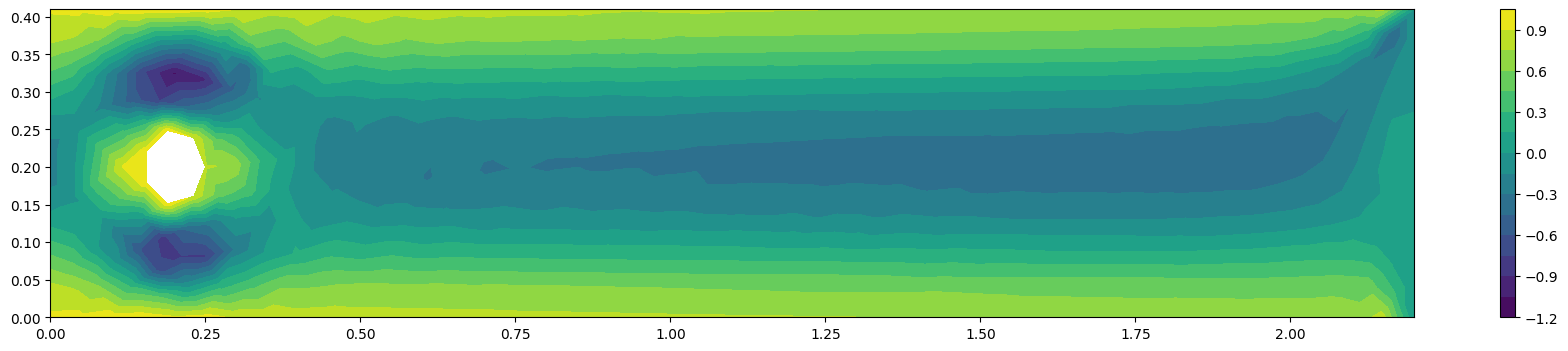

NameError: name 'interactive' is not defined

In [32]:
parameters["std_out_all_processes"] = True
set_log_level(LogLevel.INFO)
progress = Progress('Time-stepping')
PROGRESS = 1


T = 5.0            # final time
num_steps = 5000   # number of time steps
dt = T / num_steps # time step size
mu = 0.001         # dynamic viscosity
rho = 1            # density

# # Create mesh
# channel = Rectangle(Point(0, 0), Point(2.2, 0.41))
# cylinder = Circle(Point(0.2, 0.2), 0.05)
# domain = channel - cylinder
# mesh = generate_mesh(domain, 64)

mesh = Mesh("mesh.xml")
print(mesh.topology().dim())

# Define function spaces
# V = VectorFunctionSpace(mesh, 'P', 2)
V = VectorFunctionSpace(mesh, "P", 2, dim=2) 
Q = FunctionSpace(mesh, 'P', 1)

# Define boundaries
inflow   = 'near(x[0], 0)'
outflow  = 'near(x[0], 2.2)'
walls    = 'near(x[1], 0) || near(x[1], 0.41)'
cylinder = 'on_boundary && x[0]>0.1 && x[0]<0.3 && x[1]>0.1 && x[1]<0.3'

# Define inflow profile
inflow_profile = ('4.0*1.5*x[1]*(0.41 - x[1]) / pow(0.41, 2)', '0')

# Define boundary conditions
bcu_inflow = DirichletBC(V, Expression(inflow_profile, degree=2), inflow)
bcu_walls = DirichletBC(V, Constant((0, 0)), walls)

# inflow_expr = Expression(("4.0*1.5*x[1]*(0.41 - x[1]) / pow(0.41, 2)", "0", "0"), degree=2)
# bcu_inflow = DirichletBC(V, inflow_expr, inflow)
# bcu_walls = DirichletBC(V, Constant((0, 0, 0)), walls)

bcu_cylinder = DirichletBC(V, Constant((0, 0)), cylinder)
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu = [bcu_inflow, bcu_walls, bcu_cylinder]
bcp = [bcp_outflow]

# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Define functions for solutions at previous and current time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

# Define expressions used in variational forms
U  = 0.5*(u_n + u)
# n  = FacetNormal(mesh)
n = as_vector([FacetNormal(mesh)[0], FacetNormal(mesh)[1]])
f  = Constant((0, 0))
k  = Constant(dt)
mu = Constant(mu)
rho = Constant(rho)

# Define symmetric gradient
def epsilon(u):
    return sym(_nabla_grad(u))


def _nabla_grad(u):
    return as_tensor([[u[0].dx(0), u[0].dx(1)],
                     [u[1].dx(0), u[1].dx(1)]])
    
def _grad(p):
    return as_vector([p.dx(0), p.dx(1)])
    
print(u.ufl_shape)

# def epsilon(u):
#     return 0.5*(nabla_grad(u) + nabla_grad(u).T)

# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

print(_nabla_grad(u_n).ufl_shape, _nabla_grad(u_n).T.ufl_shape)
print(u_n.value_shape)

print((p_n*n).ufl_shape, v.ufl_shape)

# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx \
   + rho*dot(dot(u_n, _nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx \
   + dot(p_n*n, v)*ds - dot(mu*_nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx


a1 = lhs(F1)
L1 = rhs(F1)


def _div(u):
    return u[0].dx(0) + u[1].dx(1)


# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(_grad(p_n), _grad(q))*dx - (1/k)*_div(u_)*q*dx

# Define variational problem for step 3
a3 = dot(u, v)*dx

print(_grad(p_ - p_n).ufl_shape, v.ufl_shape)
L3 = dot(u_, v)*dx - k*dot(_grad(p_ - p_n), v)*dx

# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

# Create XDMF files for visualization output
xdmffile_u = XDMFFile('navier_stokes_cylinder/velocity.xdmf')
xdmffile_p = XDMFFile('navier_stokes_cylinder/pressure.xdmf')

# Create time series (for use in reaction_system.py)
timeseries_u = TimeSeries('navier_stokes_cylinder/velocity_series')
timeseries_p = TimeSeries('navier_stokes_cylinder/pressure_series')

# Save mesh to file (for use in reaction_system.py)
File('navier_stokes_cylinder/cylinder.xml.gz') << mesh

# Create progress bar
progress = Progress('Time-stepping')
set_log_level(PROGRESS)

# Time-stepping
t = 0
for n in range(num_steps):
    print(n, end=" ")
    # Update current time
    t += dt

    # Step 1: Tentative velocity step
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    # solve(A1, u_.vector(), b1, 'bicgstab', 'hypre_amg')
    solve(A1, u_.vector(), b1, 'gmres', 'ilu')

    # Step 2: Pressure correction step
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    # solve(A2, p_.vector(), b2, 'bicgstab', 'hypre_amg')
    solve(A2, p_.vector(), b2, 'gmres', 'ilu')

    # Step 3: Velocity correction step
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3, 'cg', 'sor')

    # Plot solution
    # print(u_.ufl_shape)
    # plot(u_, title='Velocity')
    # plot(p_, title='Pressure')
    
    # if n % 100 == 0:
    #     plt.figure(figsize=(15, 5))
        
    #     # 1. Давление
    #     plt.subplot(1, 3, 1)
    #     plot(p_, title=f'Pressure (t={t:.2f})')
    #     plt.colorbar()
        
    #     # 2. Магнитуда скорости
    #     plt.subplot(1, 3, 2)
    #     magnitude = sqrt(dot(u_, u_))
    #     plot(magnitude, title='Velocity Magnitude')
    #     plt.colorbar()
        
    #     # 3. Векторное поле
    #     plt.subplot(1, 3, 3)
    #     plot(u_, title='Velocity Vectors', mode='glyphs')
        
    #     plt.tight_layout()
    #     plt.show()
    #     clear_output(wait=True)  # Для Jupyter
    if n == 4999:
        coords = mesh.coordinates()
        values = p_.compute_vertex_values(mesh)
        
        # Создаем триангуляцию
        triangles = mesh.cells()
        
        # Визуализируем
        plt.figure(figsize=(22, 4))
        plt.tricontourf(coords[:,0], coords[:,1], triangles, values, levels=20)
        plt.colorbar()
        plt.show()
    

    # Save solution to file (XDMF/HDF5)
    xdmffile_u.write(u_, t)
    xdmffile_p.write(p_, t)

    # Save nodal values to file
    timeseries_u.store(u_.vector(), t)
    timeseries_p.store(p_.vector(), t)

    # Update previous solution
    u_n.assign(u_)
    p_n.assign(p_)
    
    # print('u max:', u_.vector().array().max())

# Hold plot
interactive()